# Welcome to the Hands-On Introduction for DRL practical course! 🤖
Notebooks created by Oliver Hausdörfer, Jonathan Külz, Hannah Markgraf.

**How to use this notebook:** You upload this .ipynb-file to google colab for editing and running (go to [colab.research.google.com](colab.research.google.com) -> File -> Open Notebook -> Upload).

**How to submit this notebook:** After finishing the HandsOn on google colab, share the uploaded notebook (click share -> Anyone with link) and send the link with the <font color='red'>completed notebook and cell outputs</font> to the course supervisor oliver.hausdoerfer@tum.de. Include your name and student ID in this e-mail.

**All tasks that need to be completed by you are marked with:** "👉 TODO: ..."


# HandsOn 1: Getting started with control policies 🤖

In this notebook, you'll learn what control policies are and how to use them to control a robotic agent. We do not start with DRL immediately, but take a step back and look at a simpler policy and Behavior Cloning (BC).

## Objectives of this Hands-On

At the end of the notebook, you will:

- Understand what control policies are and how to use them.
- Be able to apply behavior cloning.
- Be able to use standard DRL environments specified by [OpenAI Gymnasium](https://gymnasium.farama.org/index.html).
- Be introduced to [Stable Baselines 3](https://stable-baselines3.readthedocs.io/en/master/) (SB3) - a repository that implements various DRL algorithms.




## Prerequisites

- To **accelerate the agent's training on google colab, we'll use a GPU**. To do that, go to `Runtime > Change Runtime type > Hardware Accelerator > GPU`. **Important**: You need to reconnect your colab notebook afterward!

In [ ]:
%load_ext tensorboard

!apt-get update && apt-get install ffmpeg freeglut3-dev xvfb  # For visualization. If you are working on your own machine, run these in your terminal as sudo
!pip install -q "stable-baselines3"
!pip install -q "swig"
!pip install -q "gymnasium[box2d]"

Before starting with this notebook, you should be familiar with numpy and pytorch.

We import the following two libraries that you will be using often when working with DRL:

- **[Stable Baselines 3 (SB3)](https://stable-baselines3.readthedocs.io/en/master/)** is a repository that implements various DRL algorithms.

- **[Gymnasium](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fgymnasium.farama.org%2Findex.html)** provides the implementation and interfaces for common environments.

In [ ]:
import stable_baselines3
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv
import torch
import gymnasium as gym
import numpy as np

import os
import base64
from pathlib import Path
from IPython import display as ipythondisplay

# for offline use
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

print(f"{torch.__version__=}")
print(f"{stable_baselines3.__version__=}")
print(f"{gym.__version__=}")
if not torch.cuda.is_available():
    print("Did you activate the GPU? It doesn't seem to be available")

We want to see videos of the simulated environments. For this we need to specify the function "show_video".


In [ ]:
if IN_COLAB:
    # Set up fake display; otherwise rendering will fail
    os.system("Xvfb :1 -screen 0 1024x768x24 &")
    os.environ['DISPLAY'] = ':1'

def show_videos(video_path="", prefix=""):
    """
    Taken from https://github.com/eleurent/highway-env

    :param video_path: (str) Path to the folder containing videos
    :param prefix: (str) Filter the video, showing only the only starting with this prefix
    """
    html = []
    for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
        video_b64 = base64.b64encode(mp4.read_bytes())
        html.append(
            """<video alt="{}" autoplay
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />
                </video>""".format(
                mp4, video_b64.decode("ascii")
            )
        )
    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

### Create the environment

In DRL an agent (the robot) interacts with an environment. Loading a standard environment from Gymnasium is done with one line of code. For this tutorial we will use the **[BipedalWalker](https://www.gymlibrary.dev/environments/box2d/bipedal_walker/)**. Have a look at the documentation and get familiar with the state, action space, reward and termination of that environment!

👉 TODO: A good habit when you start to use an environment is to check its documentation: https://www.gymlibrary.dev/environments/box2d/bipedal_walker/

In [ ]:
env_id = "BipedalWalker-v3"
env = gym.make(env_id, render_mode=None)

Recall the environment-agent-interaction sequence that forms the foundation of DRL frameworks. If you want to fresh up the very basics of DRL, look [here](https://spinningup.openai.com/en/latest/spinningup/rl_intro.html).


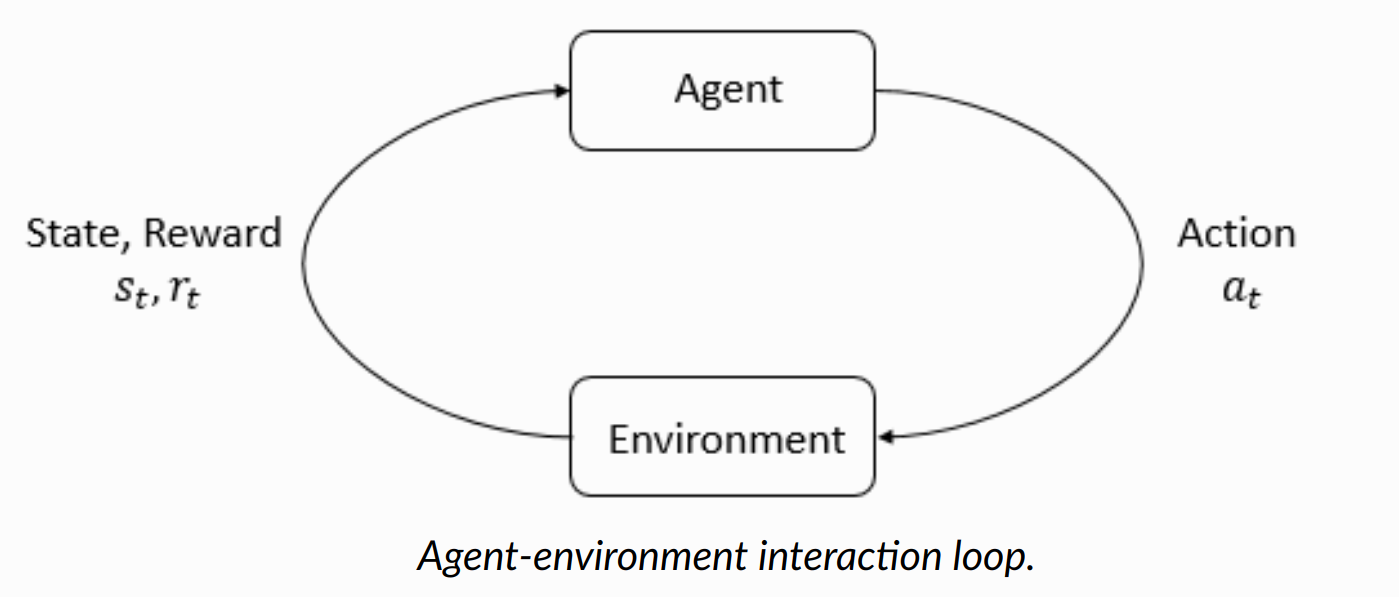

You'll work with environments provided by Gymnasium a lot in Deep Reinforcement Learning. The Gymnasium library provides two things:

- An standardized interface that allows you to create RL environments.
- A collection of environments (atari, **BipedalWalker**, ...).

Typically, an environment is used in the following manner:
  1. Create your environment using `gym.make()`
  2. Reset the environment to its initial state (s) with `observation = env.reset()`

Then at each timestep...
  3. Get an action using the model(, i.e., the policy).
  4. Use `env.step(action)` to perform this action in the environment and get
- `observation`: The new state (s')
- `reward`: The reward after executing the action
- `terminated`: Indicates if the episode terminated (agent reach the terminal state)
- `truncated`: Indicates a timelimit or if an agent go out of bounds of the environment.
- `info`: A dictionary that provides additional information (depends on the environment).

If the episode is terminated:
  5. Reset the environment to its initial state with `observation = env.reset()`

This API is also specified in the [Gymnasium API Documentation](https://gymnasium.farama.org/api/env/#gymnasium.Env.step). Make sure to check it out!

### Random Agent 🤖

We already created our environment. Lets sample a random action from our agent. For the BipedalWalker the observation and action space is of type [Box](https://gymnasium.farama.org/api/spaces/fundamental/#box). As specified in the documentation the action space has four entries.

In [ ]:
env.action_space.sample()

Now we can make the agent interact randomly with the environment. We implement the agent-env-interaction-loop shown above and let the agent sample actions randomly.

In [ ]:
rewards = []

# Reset environment
observation, info = env.reset(seed=42)
# Interact
for _ in range(10_000):
  # 👉 TODO: Randomply sample an action from the action space (one LOC)
  action = 
  observation, reward, terminated, truncated, info = env.step(action)
  if terminated or truncated:
    rewards.append(reward)
    observation, info = env.reset(seed= 42 + _)
env.close()

print("Mean reward: " + str(sum(rewards)/len(rewards)))


As you might guess, the achieved reward is not good.

To see a video of our agent, we implement the exact same interaction loop as above, but place it in a function so that it can be called from anywhere. Addtionally, we wrap our environment in a so-called wrapper, see [here](https://stable-baselines3.readthedocs.io/en/master/common/monitor.html), [here](https://www.gymlibrary.dev/api/wrappers/). A wrapper allows to  modify or extend environments without chaning its underlying core. There is one specific wrapper that allows us to record frames.

In [ ]:
def record_video(model, video_length = 500, prefix="", video_folder="videos/", env_id="BipedalWalker-v3"):
    """
    :param model: (The policy to execute)
    :param video_length: (int)
    :param prefix: (str)
    :param video_folder: (str)
    :param env_id: (str)
    """

    # Define a environment that is wrapped in a DummyVecEnv (can be used for parallization)
    # and in a VecVideoRecorder
    # Vectorized environments are used to significantly speed up DRL training.
    eval_env = DummyVecEnv([lambda: gym.make(env_id, render_mode="rgb_array")])
    eval_env = VecVideoRecorder(
        eval_env,
        video_folder=video_folder,
        record_video_trigger=lambda step: step == 0,
        video_length=video_length,
        name_prefix=prefix,
    )

    # Next we define the interaction loop.
    # The model will implement a "action, _ = model.predict(observation)" function that provides the
    # calculated action given the current observation.
    # Note that the interaction loop differs a little from the one above, as we are now using SB3 specifications.
    # You can read about the (important) differences here: https://stable-baselines3.readthedocs.io/en/master/guide/vec_envs.html
    obs = eval_env.reset()
    for _ in range(video_length):
        action, _ = model.predict(obs)
        obs, rewards, dones, info = eval_env.step(action)
    eval_env.close()

Now, we got everything together we need to vizualize the environment. We only need to pass a model to the "record_video()" function. Our random model implements the predict function that returns a random action. The structure of the return value might look a bit weird, but it is required for our implementation.

In [ ]:
class random_model:
  def predict(*args):
    return [env.action_space.sample()], None

👉 TODO: Call the record_video function with an instance of the random_model class. Pass the argument prefix="random" to the record video function as well.

In [ ]:
# 👉 Your code here. (One LOC)


In [ ]:
show_videos("videos", prefix="random")

As expected, the agent is not performant! Lets improve our control policy!

### Heuristic model 🤖

Next, we don't use a random policy but a heuristic, i.e., an empirically designed function that fulfills the control goal somewhat. The following heuristics is provided for the BipedalWalker in [Gymnasium](https://github.com/Farama-Foundation/Gymnasium/blob/fa8ebe372c8063aef559db02b04aa4949145c2a3/gymnasium/envs/box2d/bipedal_walker.py#L785).

In [ ]:
# heuristics
import numpy as np

class BipedalWalkerHeuristics:

  STAY_ON_ONE_LEG, PUT_OTHER_DOWN, PUSH_OFF = 1, 2, 3
  SPEED = 0.29  # Will fall forward on higher speed
  state = STAY_ON_ONE_LEG
  moving_leg = 0
  supporting_leg = 1 - moving_leg
  SUPPORT_KNEE_ANGLE = +0.1
  supporting_knee_angle = SUPPORT_KNEE_ANGLE
  a = np.array([0.0, 0.0, 0.0, 0.0])

  def predict(self, s, *args, **kwargs):

    s = s[0] # make compatible with SB3 API

    moving_s_base = 4 + 5 * self.moving_leg
    supporting_s_base = 4 + 5 * self.supporting_leg

    hip_targ = [None, None]  # -0.8 .. +1.1
    knee_targ = [None, None]  # -0.6 .. +0.9
    hip_todo = [0.0, 0.0]
    knee_todo = [0.0, 0.0]

    if self.state == self.STAY_ON_ONE_LEG:
        hip_targ[self.moving_leg] = 1.1
        knee_targ[self.moving_leg] = -0.6
        self.supporting_knee_angle += 0.03
        if s[2] > self.SPEED:
            self.supporting_knee_angle += 0.03
        self.supporting_knee_angle = min(self.supporting_knee_angle, self.SUPPORT_KNEE_ANGLE)
        knee_targ[self.supporting_leg] = self.supporting_knee_angle
        if s[supporting_s_base + 0] < 0.10:  # supporting leg is behind
            self.state = self.PUT_OTHER_DOWN
    if self.state == self.PUT_OTHER_DOWN:
        hip_targ[self.moving_leg] = +0.1
        knee_targ[self.moving_leg] = self.SUPPORT_KNEE_ANGLE
        knee_targ[self.supporting_leg] = self.supporting_knee_angle
        if s[moving_s_base + 4]:
            self.state = self.PUSH_OFF
            self.supporting_knee_angle = min(s[moving_s_base + 2], self.SUPPORT_KNEE_ANGLE)
    if self.state == self.PUSH_OFF:
        knee_targ[self.moving_leg] = self.supporting_knee_angle
        knee_targ[self.supporting_leg] = +1.0
        if s[supporting_s_base + 2] > 0.88 or s[2] > 1.2 * self.SPEED:
            self.state = self.STAY_ON_ONE_LEG
            self.moving_leg = 1 - self.moving_leg
            self.supporting_leg = 1 - self.moving_leg

    if hip_targ[0]:
        hip_todo[0] = 0.9 * (hip_targ[0] - s[4]) - 0.25 * s[5]
    if hip_targ[1]:
        hip_todo[1] = 0.9 * (hip_targ[1] - s[9]) - 0.25 * s[10]
    if knee_targ[0]:
        knee_todo[0] = 4.0 * (knee_targ[0] - s[6]) - 0.25 * s[7]
    if knee_targ[1]:
        knee_todo[1] = 4.0 * (knee_targ[1] - s[11]) - 0.25 * s[12]

    hip_todo[0] -= 0.9 * (0 - s[0]) - 1.5 * s[1]  # PID to keep head strait
    hip_todo[1] -= 0.9 * (0 - s[0]) - 1.5 * s[1]
    knee_todo[0] -= 15.0 * s[3]  # vertical speed, to damp oscillations
    knee_todo[1] -= 15.0 * s[3]

    self.a[0] = hip_todo[0]
    self.a[1] = knee_todo[0]
    self.a[2] = hip_todo[1]
    self.a[3] = knee_todo[1]
    self.a = np.clip(0.5 * self.a, -1.0, 1.0)

    return [self.a], None # make compatible with SB3 API

👉 TODO: Call the record video function again, but with the above specified heuristic model. Pass the argument prefix="heuristics" to the function.

In [ ]:
# 👉 Your code here. (One line of code.)


In [ ]:
show_videos("videos", prefix="BipedalWalker-heuristics")

### Behavior Cloning (BC) 🤖

Next we perform behavior cloning. This means we want to copy the above heuristics (the 'expert') into a neural network policy (the 'student'). This can be very useful if we want to warmstart a policy instead of learning from scratch.

BC can be useful when some heuristic or model of the agent exists. By providing this knowledge to a policy that we subsequently train with DRL training can converge faster. On the other hand, a pre-training with a heuristic introduces a bias to our model and might lead to a suboptimal policy in the end.

Note that the BC we are implementing here is very simplistic, and much more efficient approaches, such as [DAgger](https://imitation.readthedocs.io/en/latest/algorithms/bc.html#behavioral-cloning-bc) exist.

First, we collect interaction samples of the agent with the environment.

In [ ]:
num_interactions = 300_000
expert_observations = np.empty((num_interactions,) + env.observation_space.shape)
expert_actions = np.empty((num_interactions,) + (env.action_space.shape[0],))
expert =  BipedalWalkerHeuristics()
obs, _ = env.reset()
for i in range(num_interactions):
    action, _ = expert.predict([obs])
    action = action[0]
    expert_observations[i] = obs
    expert_actions[i] = action
    obs, rew, term, trunc, info = env.step(action)
    # reset env every 250 interactions to gather more diverse data
    if term or trunc or i % 250 == 0:
        obs,_ = env.reset()
    if (i+1) % 50_000 == 0:
        print(f"Collected {i} samples")


Next, we pack the samples in a Dataset and then in a DataLoader that can be used by pytorch for training a NN.

👉 TODO: Time to refresh your DL knowledge! We already provide the ExpertDataSet Class. Your task is to create a dataset (from ExpertDataSet class) and a dataloader (from [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html)) that can be used to train a pytorch model! Use a batch_size of 128. You can look up the basics of Datasets and Dataloaders [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).

In [ ]:
from torch.utils.data.dataset import Dataset
import torch

class ExpertDataSet(Dataset):
    def __init__(self, expert_observations, expert_actions):
        self.observations = expert_observations
        self.actions = expert_actions

    def __getitem__(self, index):
        return (self.observations[index], self.actions[index])

    def __len__(self):
        return len(self.observations)

# 👉 TODO: Your code here. Create a ExpertDataSet with the name "expert_dataset" and a
# DataLoader with the name "train_loader".
# 2-4 LOC




👉 TODO: Implement a Pytorch Module called "Student" based on nn.Module. This will be our student policy. Use two hidden layers with 64 neurons each and torch.relu as activation function. As we try to mimic our heuristic from above, the student policy needs to have the same inputs and outputs as the heuristic. Input: the observations; output: the actions.

In [ ]:
import torch as th
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch import utils, Tensor

class Student(nn.Module):
    def __init__(self):
        super().__init__()
        # 👉 TODO: Implement NN architecture (~3 LOC)
        


        # END TODO
        self.double() # make sure datatype is compatible

    def forward(self, x):
        # 👉 TODO: implement forward pass (~3 LOC)
        

        
        # END TODO

    def predict(self, x):
      return self.forward(th.tensor(x).double()).detach().numpy(), None

In [ ]:
student = Student()

Next, we implement the usual training routine for NNs.
(Note that I recommend using [Pytorch Lightning](https://lightning.ai/docs/pytorch/stable/) to train your NN for you own projects. Here we use plain pytorch for transparency.)

In [ ]:
def train_student(
    student_policy,
    train_loader,
    epochs=10,
    scheduler_gamma=0.7,
    learning_rate=0.01,
    log_interval=100,
    seed=1,
):
    th.manual_seed(seed)
    device = th.device("cuda" if th.cuda.is_available() else "cpu")

    criterion = nn.MSELoss()

    model = student_policy.to(device)

    def train(model, device, train_loader, optimizer):
        model.train()

        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            action = model(data).double()
            loss = criterion(action, target)
            loss.backward()
            optimizer.step()
            if batch_idx % log_interval == 0:
                print(
                    "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                        epoch,
                        batch_idx * len(data),
                        len(train_loader.dataset),
                        100.0 * batch_idx / len(train_loader),
                        loss.item(),
                    )
                )

    # Define an Optimizer and a learning rate schedule.
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = StepLR(optimizer, step_size=1, gamma=scheduler_gamma)

    # Now we are finally ready to train the policy model.
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer)
        scheduler.step()

    return model

In [ ]:
student = train_student(
    student,
    train_loader
)

We pretrained our student policy now using the aggregated data from the expert. Lets see how the student performs visually:

In [ ]:
student.eval()
student.cpu()
record_video(student, prefix="student")
show_videos("videos", prefix="student")

Interestingly, for our case the student performs worse than the expert. Why might that be? We suspect there is one major reason. The heuristics is empirically designed and works only for a subspace of the state space. The student does not learn to generalize beyond that subspace. The slightest deviation from seen agent-environment interactions (or a not fully replicated heuristic by the student, i.e., a non-zero loss,) might degrate the performance drastically. We see that designing or replicating policies is not an easy task.

P.S.: In that case there is a work around to make the agent walk with the student policy. 👉 VOLUNTARY TODO: change the interaction loop in the record_video() function so that the first 50 steps in the environment are taken by the _expert_, and all following by the _student_. (If it doesn't work on first try, run the video recording some more times. Depending on the random initialization of the env it doesn't work sometimes.)

### Reinforcement Learning Agent 🤖

We have seen how a suboptimal policy (for instance a heuristic) can be used to control an agent. We also saw how the behavior of this heuristic can be cloned into a NN.

Finally, we train the agent from scratch using a DRL framework. Specifically, we will use the PPO implementation of SB3. PPO is a commonly used and robust framework, which is why we use it here. You don't need to worry about the details of PPO for now.

In [ ]:
from stable_baselines3 import PPO

# parameters partly taken from https://github.com/DLR-RM/rl-baselines3-zoo/blob/master/hyperparams/ppo.yml

# init the PPO agent
expert_ppo = PPO(
  'MlpPolicy',
  env_id,
  verbose=1,
  normalize_advantage= True,
  batch_size= 256,
  n_steps= 4000,
  gamma= 0.999,
  learning_rate= 3e-4,
  ent_coef= 0.0,
  clip_range= 0.18,
  n_epochs= 10,
)

# Train the agent.
# The 750_000 timesteps are probably a bit overpowered for that env, but we want to make sure it converges.
# The training might take some time.
expert_ppo.learn(total_timesteps=750_000)

In [ ]:
record_video(expert_ppo, video_length=500, prefix="BipedalWalker-ppo")
show_videos("videos", prefix="BipedalWalker-ppo")

Heureka - your first trained DRL agent! 🤖

What could be done now is to use the trained _student_ from above to warmstart the training of the PPO agent. For this one can simply assign the _student_ to the _expert_ppo.policy.mlp_extractor.policy_net_ before starting the training. We will not conver this in this notebook, but you are free to play around with it.

In [ ]:
# Warmstart the agent.
# Note: in this case the training will fail due to data type mismatches.
expert_ppo.policy.mlp_extractor.policy_net = student

# HandsOn 1: Finished 🤖

**How to submit this notebook:** After finishing the HandsOn on google colab, share the uploaded notebook (click share -> Anyone with link) and send the link with the <font color='red'>completed notebook and cell outputs</font> to the course supervisor oliver.hausdoerfer@tum.de. Include your name and student ID in this e-mail.